# TEMPLATE 

  Training, and  Testing.  Measures of perfomance.
  Evaluation of a classification pipeline: standard scaler and perceptron.
  

In [131]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

# Toy Data

Starting with toy data to understand the main characteristics of the models. 
1. Creating artificial data with two characteristics 
    might be useful.

Scikit- learn provides also data sets with real data and all of them are avalaible and easily download and written in the proper formats 

https://scikit-learn.org/stable/datasets/index.html

In [132]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.4)

In [133]:
print(np.unique(y_blobs))

[0 1]


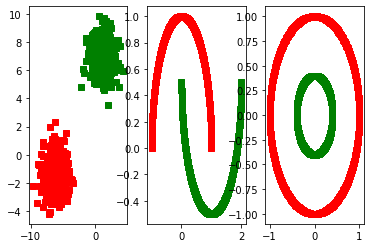

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )


# Model  Evaluation
Read the section 4.5 (4.5.1 and 4.5.3)

Tan , Steinback and Kumar: Introduction to Data Mining

**or** the following  technical report

https://arxiv.org/abs/1811.12808


The following code introduces the main steps of the most used strategies to evaluate a model

### Learning  and testing

In [135]:
# The Data set
X=X_moon
y=y_moon 

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


# Strategy of Evaluation I:  Train and Test with hold-out

Aplicable if the data set is large.

In [137]:
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split( X, y, test_size=0.4, random_state=0)
 
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split( X_blobs, y_blobs, test_size=0.4, random_state=0)

X_train_cir, X_test_cir, y_train_cir, y_test_cir = train_test_split( X_cir, y_cir, test_size=0.4, random_state=0)

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
Xs=scaler.fit_transform(X_train_moon)

Xtest=scaler.transform(X_test_moon)
    

In [139]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X_train_moon,y_train_moon)



Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

In [140]:
y_pred=ppn.predict(X_test_moon)
cm = confusion_matrix(y_test_moon,y_pred)
print(cm)

[[165  38]
 [  7 190]]


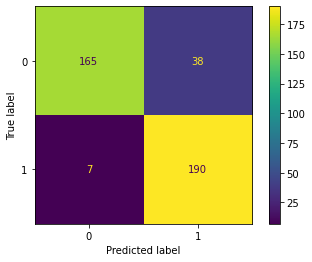

In [141]:
plot_confusion_matrix(ppn, X_test_moon, y_test_moon)  
plt.show() 

In [142]:
#Performance metrics estimated based on confusion matrix
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ', acc)

# Precision
precision = tp/(tp+fp)
print('Precision = ', precision)

#Recall
recall = tp/(tp+fn)
print('Recall = ', recall)

#F1 Score
f1 = (2*tp)/(2*tp + fp + fn)
print('F1 score = ', f1)

#MCC
import math
mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  0.8875
Precision =  0.8333333333333334
Recall =  0.9644670050761421
F1 score =  0.8941176470588236
Matthews correlation coefficient  =  0.7849176976574406


In [143]:
# Performance metrics using sklearn.metrics

from sklearn.metrics import *

#Accuracy
acc = accuracy_score(y_test_moon, y_pred)
print('Accuracy = ', acc)

# Precision
precision = precision_score(y_test_moon, y_pred)
print('Precision = ', precision)

#Recall
recall = recall_score(y_test_moon, y_pred)
print('Recall = ', recall)

#F1 Score
f1 = f1_score(y_test_moon, y_pred)
print('F1 score = ', f1)

#MCC
mcc = matthews_corrcoef(y_test_moon, y_pred)
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  0.8875
Precision =  0.8333333333333334
Recall =  0.9644670050761421
F1 score =  0.8941176470588235
Matthews correlation coefficient  =  0.7849176976574406


In [144]:
scaler = StandardScaler()   
Xs=scaler.fit_transform(X_train_blobs)

Xtest=scaler.transform(X_test_blobs)

In [145]:
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X_train_blobs,y_train_blobs)


Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

In [146]:
y_pred=ppn.predict(X_test_blobs)
cm = confusion_matrix(y_test_blobs,y_pred)
print(cm)

[[204   0]
 [  0 196]]


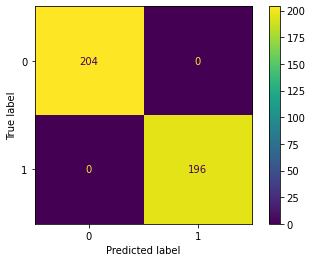

In [147]:
plot_confusion_matrix(ppn, X_test_blobs, y_test_blobs)  
plt.show() 

In [148]:
#Performance metrics estimated based on confusion matrix
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ', acc)

# Precision
precision = tp/(tp+fp)
print('Precision = ', precision)

#Recall
recall = tp/(tp+fn)
print('Recall = ', recall)

#F1 Score
f1 = (2*tp)/(2*tp + fp + fn)
print('F1 score = ', f1)

#MCC
mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 score =  1.0
Matthews correlation coefficient  =  1.0


In [149]:
# Performance metrics using sklearn.metrics

#Accuracy
acc = accuracy_score(y_test_blobs, y_pred)
print('Accuracy = ', acc)

# Precision
precision = precision_score(y_test_blobs, y_pred)
print('Precision = ', precision)

#Recall
recall = recall_score(y_test_blobs, y_pred)
print('Recall = ', recall)

#F1 Score
f1 = f1_score(y_test_blobs, y_pred)
print('F1 score = ', f1)

#MCC
mcc = matthews_corrcoef(y_test_blobs, y_pred)
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 score =  1.0
Matthews correlation coefficient  =  1.0


In [150]:
scaler = StandardScaler()   
Xs=scaler.fit_transform(X_train_cir)

Xtest=scaler.transform(X_test_cir)

In [151]:
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(X_train_cir,y_train_cir)

Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

In [152]:
y_pred=ppn.predict(X_test_cir)
cm = confusion_matrix(y_test_cir,y_pred)
print(cm)

[[196   0]
 [204   0]]


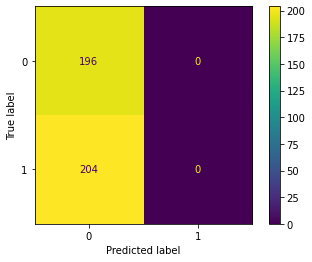

In [153]:
plot_confusion_matrix(ppn, X_test_cir, y_test_cir)  
plt.show() 

In [154]:
#Performance metrics estimated based on confusion matrix
tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

#Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
print('Accuracy = ', acc)

# Precision
precision = tp/(tp+fp)
print('Precision = ', precision)

#Recall
recall = tp/(tp+fn)
print('Recall = ', recall)

#F1 Score
f1 = (2*tp)/(2*tp + fp + fn)
print('F1 score = ', f1)

#MCC
mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  0.49
Precision =  nan
Recall =  0.0
F1 score =  0.0
Matthews correlation coefficient  =  nan


<ipython-input-154-8b10f6d6cfe5>:12: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)
<ipython-input-154-8b10f6d6cfe5>:24: RuntimeWarning: invalid value encountered in true_divide
  mcc = (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))


In [155]:
# Performance metrics using sklearn.metrics

#Accuracy
acc = accuracy_score(y_test_cir, y_pred)
print('Accuracy = ', acc)

# Precision
precision = precision_score(y_test_cir, y_pred)
print('Precision = ', precision)

#Recall
recall = recall_score(y_test_cir, y_pred)
print('Recall = ', recall)

#F1 Score
f1 = f1_score(y_test_cir, y_pred)
print('F1 score = ', f1)

#MCC
mcc = matthews_corrcoef(y_test_cir, y_pred)
print('Matthews correlation coefficient  = ', mcc)

Accuracy =  0.49
Precision =  0.0
Recall =  0.0
F1 score =  0.0
Matthews correlation coefficient  =  0.0


/home/catarina/git/ed/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/catarina/git/ed/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


### Exercise: 
1. Try to understand the contents of the confusion matrix . Describe each of the entries by your own words

**Answer:** The confusion matrix (for binary classes) is composed of four different cells: TN, TP, FN and FP.
TN is the true negatives and TP is the true positives. These values represent the classes correctly classified by the model.
FP is the false negatives and FP is the false positives. These values represent the classes wrongly classified by the model.
The main diagonal represents the true part and the remaining cells represents the misclassifications.

2. Using the confusion matrix estimate: accuracy, recall, precision 

**Answer:** The estimated metrics were computed for each dataset. We also include F1_score and MCC.
The F1_score combines precision and recall into a single value.
MCC is being widely used nowadays to evaluate model accuracy.

3. Use the other facilities of the package sklearn.metrics to estimate the scores.

**Answer:** We also used the sklearn.metrics functions to compute the scores. It was possible to validate our previous computation.


# Strategy of Evaluation II:  K-fold train and test


The most widely used strategy to evalaute a classifier when the data set is not long enough

In [ ]:
from sklearn.model_selection import StratifiedKFold
    

In [ ]:
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#### pre-processing included in the classification pipeline
##### 5-fold cross-validation.

In [ ]:
k_fold = StratifiedKFold(n_splits=5)

acc = np.array([])
precision = np.array([])
recall = np.array([])
f1 = np.array([])
mcc = np.array([])

for X,y in [(X_moon, y_moon), (X_blobs, y_blobs), (X_cir, y_cir)]:

    for train_indices, test_indices in k_fold.split(X,y):
        scaler = StandardScaler() 
        X_train=X[train_indices]

        Xs=scaler.fit_transform(X_train)

        Xtest=scaler.transform(X[test_indices])

        ppn.fit(Xs,y[train_indices])

        y_pred=ppn.predict(Xtest)
        cm = confusion_matrix(y[test_indices],y_pred)
        print(cm)

        tp = cm[1][1]
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]

        #Accuracy
        acc = np.append(acc, (tp+tn)/(tp+tn+fp+fn))

        # Precision
        precision = np.append(precision, tp/(tp+fp))


        #Recall
        recall = np.append(recall, tp/(tp+fn))


        #F1 Score
        f1 = np.append(f1, (2*tp)/(2*tp + fp + fn))


        #MCC
        mcc =np.append(mcc, (tp*tn-fp*fn)/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
   
    print('Accuracy = ', np.average(acc))
    print('Precision = ', np.average(precision))
    print('Recall = ', np.average(recall))
    print('F1 = ', np.average(f1))
    print('Matthews correlation coefficient = ', np.average(mcc))
    print('********************************************************************************')
   
    

### Exercise: introduce in the loop  the calculation of scores using the facilities of the package sklearn.metrics


**Answer:** For each loop we computed the perfomance metrics based on the confusion matrix.
The final metrics are the average of the k folds. 